<a href="https://colab.research.google.com/github/matsunagalab/lecture_OR/blob/main/solver03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ソルバ3: PuLPで整数計画問題を解く

前回と同じように左上の「ファイル」メニューから「ドライブにコピーを保存」して始めてください。

今回は、整数計画をPuLPで解きます。基本的な文法は以前行った線形計画問題と同じですが、変数の型を実数ではなく整数や0 or 1とするところが違います。

## PuLPのインストール

前回同様、まずPuLPをインストールします。

In [ ]:
!pip install pulp

インストールが成功したか確認するために、pythonでPuLPパッケージをimportしてみます。なにも出力されなければ成功です。

In [ ]:
# PuLPをロードする
from pulp import *

## PuLPの復習

以下の線形計画問題を解いてPuLPを復習してみましょう

\begin{gathered}
\operatorname{minimize} z=-x_1 - x_2 \\
\text { subject to } 2 x_1 + x_2 \leq 2 \\
x_1 + 2 x_2 \leq 2 \\
x_1, x_2 \geq 0
\end{gathered}

In [ ]:
# 問題を定義する、最小化する場合
problem = LpProblem('Problem_Name', LpMinimize)

# 決定変数 𝑥_1≥0の定義
x1 = LpVariable('x1', 0, None, LpContinuous)

# 決定変数 𝑥_2≥0の定義
x2 = LpVariable('x2', 0, None, LpContinuous)

# 目的関数 𝑧=-𝑥_1-𝑥_2 の定義
problem += - x1 - x2

# 制約条件 2𝑥_1+𝑥_2≤2 の定義
problem += 2*x1 + x2 <= 2.0

# 制約条件 𝑥_1+2𝑥_2≤2 の定義
problem += x1 + 2*x2 <= 2.0

# 問題を出力して確認
print()
print("-" * 10)
print(problem)

# 定義した問題を解く
problem.solve()

# 解けたかどうかのチェック
# “Not Solved”, “Infeasible”, “Unbounded”, “Undefined” or “Optimal”.
print()
print("-" * 10)
print('Status:', LpStatus[problem.status])

# 最適解の出力
for v in problem.variables():
    print(v.name, '=', v.varValue)

# 最適値の出力
print('The optimum value is ', value(problem.objective))

## 最短経路問題

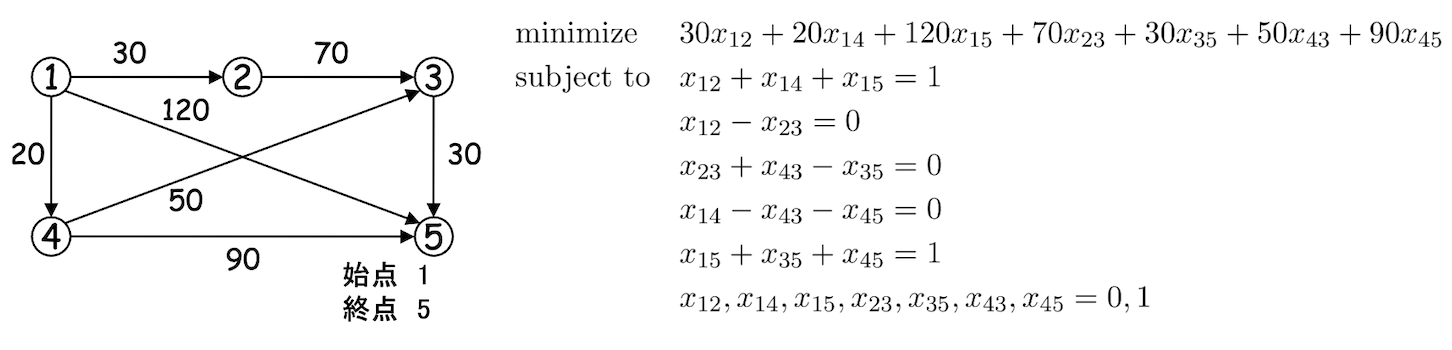

In [ ]:
# リストの復習
elems = []
for i in range(5):
  elems.append(i)

elems

In [ ]:
# 二重リストの復習
elems = []
for i in range(2):
  e = []
  for j in range(5):
    e.append(j)
  elems.append(e)

elems

In [ ]:
# リスト内包表記の復習
[i for i in range(5)]

In [ ]:
p = LpProblem("最短経路問題", LpMinimize)

nvertex = 5

distance = []
for i in range(nvertex):
  d = []
  for j in range(nvertex):
    d.append(10**10) #存在しない辺にはとても大きな長さを代入
  distance.append(d)

distance[0][1] = 30
distance[0][3] = 20
distance[0][4] = 120
distance[1][2] = 70
distance[2][4] = 30
distance[3][2] = 50
distance[3][4] = 90

vars = []
for i in range(nvertex):
  v = []
  for j in range(nvertex):
    v.append(LpVariable("x_"+str(i)+str(j), 0, 1, LpInteger))
  vars.append(v)

# 目的関数
p += lpSum([vars[i][j]*distance[i][j] for i in range(5) for j in range(5)])

# 制約条件
p += lpSum([vars[0][j] for j in range(nvertex)]) == 1
p += lpSum([vars[i][nvertex-1] for i in range(nvertex)]) == 1

for i in range(1, nvertex-1):
  p += lpSum([vars[j][i] for j in range(nvertex)]) - lpSum([vars[i][j] for j in range(nvertex)]) == 0

print()
print("-" * 10)
print(p)

p.solve()

print()
print("-" * 10)
print('Status:', LpStatus[p.status])
for v in p.variables():
    print(v.name, '=', v.varValue)
print('The optimum value is ', value(p.objective))

以前の回で求めたダイクストラ法の解答と同じになっているかチェックしてみましょう

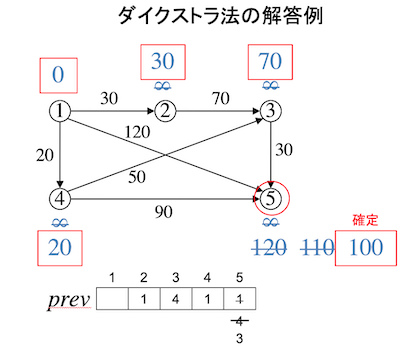

## 最大流問題

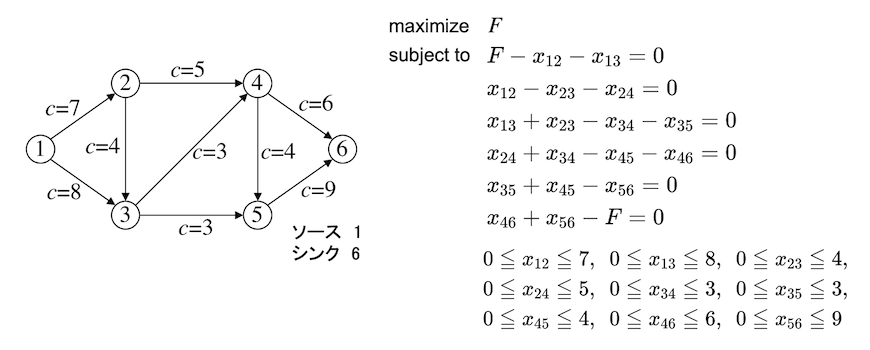

In [ ]:
p = LpProblem("最大流問題", LpMaximize)

nvertex = 6

capacity = []
for i in range(nvertex):
  c = []
  for j in range(nvertex):
    c.append(0) #存在しない辺の容量は0とする
  capacity.append(c)

capacity[0][1] = 7
capacity[0][2] = 8
capacity[1][2] = 4
capacity[1][3] = 5
capacity[2][3] = 3
capacity[2][4] = 3
capacity[3][4] = 4
capacity[3][5] = 6
capacity[4][5] = 9

vars = []
for i in range(nvertex):
  v = []
  for j in range(nvertex):
    v.append(LpVariable("x_"+str(i)+str(j), 0, capacity[i][j], LpInteger))
  vars.append(v)

# 目的関数
p += lpSum([vars[0][j] for j in range(nvertex)])

# 制約条件
for i in range(1, nvertex-1):
  p += lpSum([vars[i][j] for j in range(nvertex)]) - lpSum([vars[j][i] for j in range(nvertex)]) == 0

print()
print("-" * 10)
print(p)

p.solve()

print()
print("-" * 10)
print('Status:', LpStatus[p.status])
for v in p.variables():
    print(v.name, '=', v.varValue)
print('The optimum value is ', value(p.objective))

以前の回で求めた増加パス手法の解答と同じになっているかチェックしてみましょう

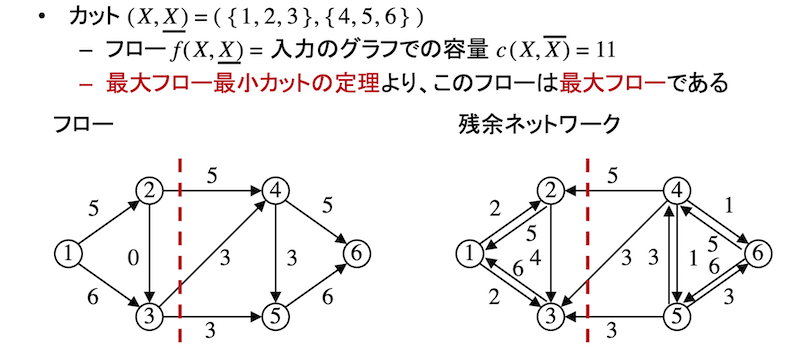

## 練習問題1：ナップサック問題

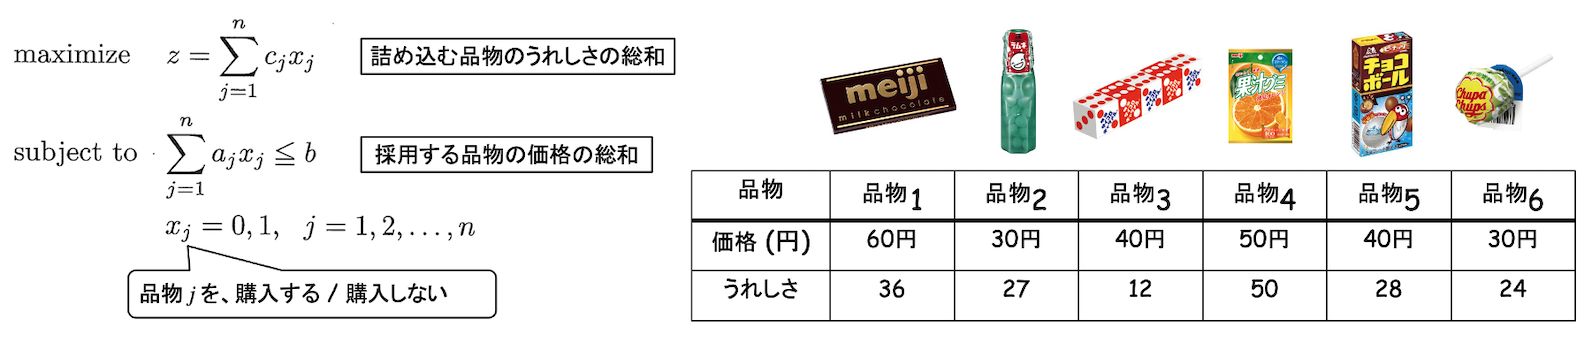

In [ ]:
# ここにコードを書く

## 練習問題2：節点カバー問題

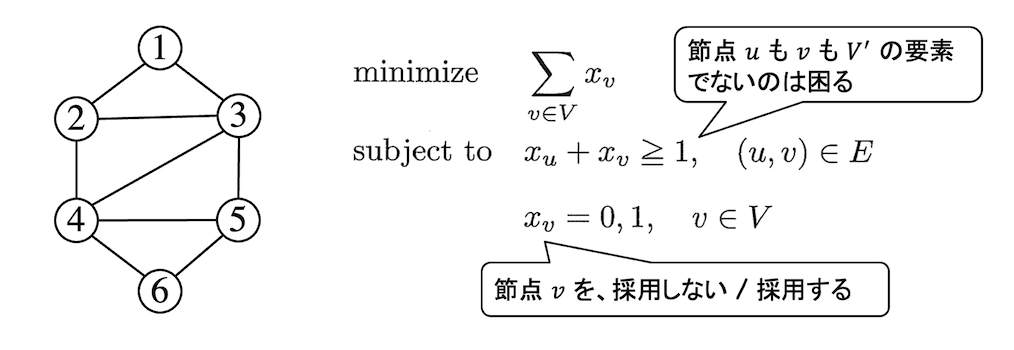

In [ ]:
# if文の学習
x = 3
if x > 1:
  print('true')

In [ ]:
# ここにコードを書く